In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10_000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200_000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("311_Service_Requests.pkl")

# Einfacher Import
df = pd.read_pickle(path)



In [5]:

# schneller Blick
df.head()

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR25-01854880,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,10/09/2025 06:15:36 AM,10/09/2025 06:15:37 AM,10/09/2025 06:15:36 AM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,10,NaN,NaN,NaN,NaN,NaN
1,SR25-01854879,Street Light Out Complaint,SFD,CDOT - Department of Transportation,CDOT - Department of Transportation,Open,Phone Call,10/09/2025 06:15:11 AM,10/09/2025 06:15:15 AM,NaN,2349 S MICHIGAN AVE,Chicago,Illinois,60616.0,2349,S,MICHIGAN,AVE,False,False,NaN,NaN,33.0,3.0,9.0,Q027,3.0,1.0,132.0,17.0,NaN,6,5,10,1.177605e+06,1.888599e+06,41.849652,-87.623655,"(41.849651690964, -87.623654640637)"
2,SR25-01854878,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,10/09/2025 06:14:56 AM,10/09/2025 06:14:56 AM,10/09/2025 06:14:56 AM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,10,NaN,NaN,NaN,NaN,NaN
3,SR25-01854877,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,10/09/2025 06:14:28 AM,10/09/2025 06:14:28 AM,10/09/2025 06:14:28 AM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,10,NaN,NaN,NaN,NaN,NaN
4,SR25-01854876,Pothole in Street Complaint,PHF,311 City Services,CDOT - Department of Transportation,Open,Phone Call,10/09/2025 06:14:15 AM,10/09/2025 06:14:17 AM,NaN,600 S CANAL ST,Chicago,Illinois,NaN,600,S,CANAL,ST,False,False,NaN,NaN,28.0,28.0,7.0,O024,2.0,1.0,124.0,27.0,NaN,6,5,10,1.173217e+06,1.897587e+06,41.874414,-87.639494,"(41.874414223372, -87.639493836535)"


In [6]:
from IPython.display import display
display(df.nunique().to_frame('nunique')) #weil sonst die ausgabe gekürzt wird

,nunique
SR_NUMBER,12671307
SR_TYPE,110
SR_SHORT_CODE,110
CREATED_DEPARTMENT,21
OWNER_DEPARTMENT,16
STATUS,4
ORIGIN,46
CREATED_DATE,11755798
LAST_MODIFIED_DATE,4599115
CLOSED_DATE,10846804


MemoryError: Unable to allocate 7.55 GiB for an array with shape (12671308, 40, 2) and data type int64

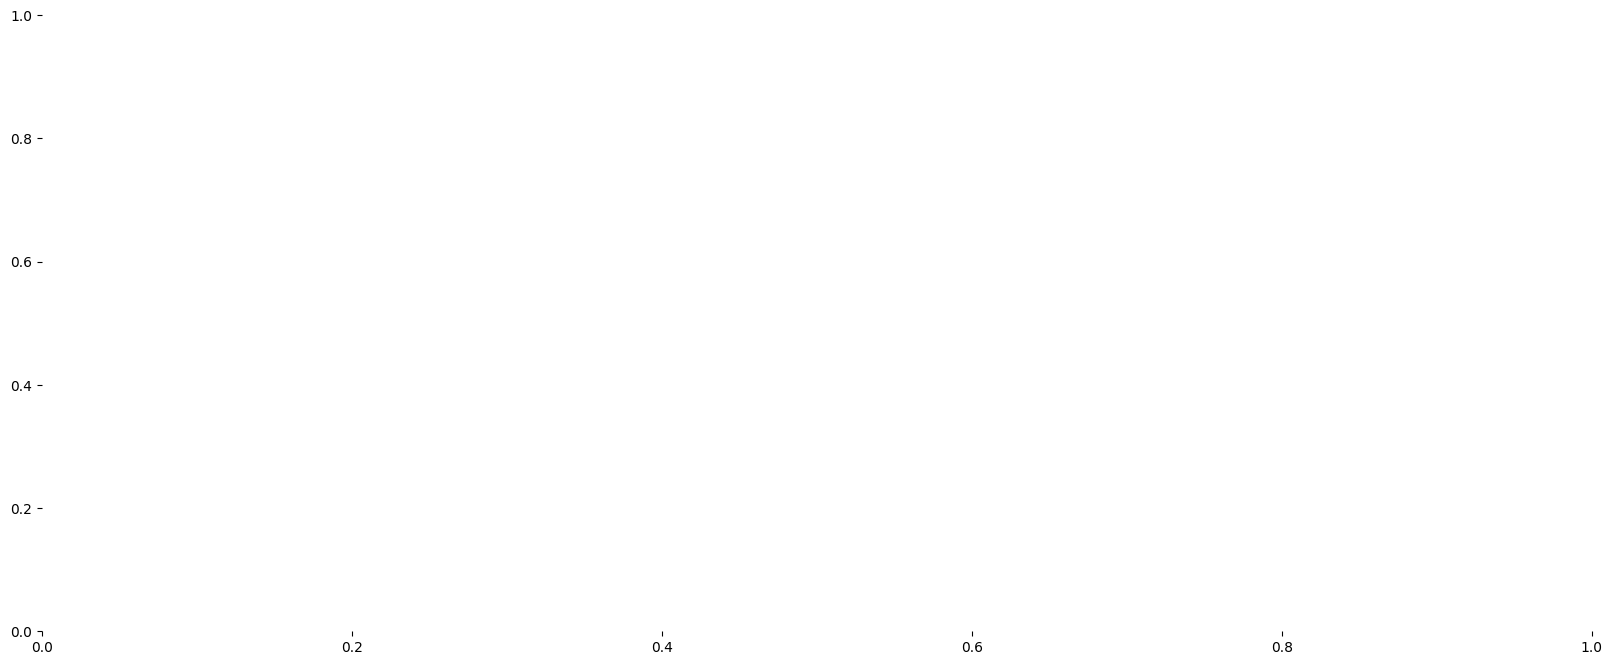

In [7]:
plt.figure(figsize=(20, 8))  # Breite und Höhe anpassen
sns.heatmap(df.isna(), cbar=False)
plt.xticks(rotation=45, ha='right')  # Achsenbeschriftung lesbar machen
plt.show()

In [ ]:
df.shape

(11818315, 39)

In [ ]:
def show_full_info(df):
    buf = StringIO()
    df.info(buf=buf, verbose=True, max_cols=None, show_counts=True)
    print(buf.getvalue())


show_full_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818315 entries, 0 to 11818314
Data columns (total 39 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   SR_NUMBER                 11818315 non-null  object 
 1   SR_TYPE                   11818315 non-null  object 
 2   SR_SHORT_CODE             11818315 non-null  object 
 3   CREATED_DEPARTMENT        7021133 non-null   object 
 4   OWNER_DEPARTMENT          11818315 non-null  object 
 5   STATUS                    11818315 non-null  object 
 6   ORIGIN                    11818315 non-null  object 
 7   CREATED_DATE              11818315 non-null  object 
 8   LAST_MODIFIED_DATE        11818315 non-null  object 
 9   CLOSED_DATE               11616601 non-null  object 
 10  STREET_ADDRESS            11807521 non-null  object 
 11  CITY                      7673048 non-null   object 
 12  STATE                     7673048 non-null   object 
 13  ZIP_CODE  

In [ ]:
df.describe()

NameError: name 'df' is not defined

2. Bias